# Preparetion

In [1]:
library(dplyr) ## pipe command
library(psych) ## phi coefficent
library(epiDisplay)## Calculating odd ration 
library(performance) ## Caculating psuedo R^2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: foreign

Loading required package: survival

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: nnet


Attaching package: ‘epiDisplay’


The following objects are masked from ‘package:psych’:

    alpha, cs, lookup




In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] performance_0.7.0  epiDisplay_3.5.0.1 nnet_7.3-14        MASS_7.3-53       
[5] survival_3.2-7     foreign_0.8-80     psych_2.0.12       dplyr_1.0.2       

loaded via a namespace (and not attached):
 [1] pillar_1.4.7        compiler_4.0.3      base64enc_0.1-3    
 [4] tools_4.0.3         digest_0.6.27       uuid_0.1-4         
 [7] jsonlite_1.7.2      evaluate_0.14       lifecycle_0.2.0    
[10] tibble_3.0.4        nlme_3.1-149        lattice_0.20-41    
[13] pkgconfig_2.0.3     rlang_0.4

## reading data

In [3]:
raw_df<-read.csv("data.csv")

## data coding and standardization

In [4]:
ansID = raw_df$Majority != "noanswer"


df<-raw_df[ansID,]

Majorityval<-numeric(dim(df)[2])
Majorityval[df$Majority == "E"]<-1
Majorityval[df$Majority == "O"]<-0
age_non<-df$age

df$age<-as.numeric(scale(df$age))

df<-cbind(df, Majorityval)
df<-cbind(df, age_non)
head(df)

,ID,Idsub,Place_code,Gender,Majority,age,Majorityval,age_non
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
2,2,2,monastery,M,O,0.9966890,0,9
3,3,3,monastery,M,E,0.9966890,1,9
5,5,5,monastery,M,E,NA,1,NA
6,6,6,monastery,M,E,1.5780909,1,10
7,7,7,monastery,M,O,0.4152871,0,8
8,8,8,monastery,M,O,-0.7475167,0,6


## discriptive statistics  in cross table

### gender  x field sights

In [5]:
table(df$Gender, df$Place_code)

   
    day_care international monastery
  F        5             4         0
  M       10             3        29

### age  x field sights

In [6]:
table(df$Place_code, df $age_non)

               
                4 5 6 7 8 9 10 11
  day_care      1 2 5 1 2 2  1  1
  international 0 0 2 3 2 0  0  0
  monastery     0 4 5 5 5 4  3  1

### gender  x age

In [7]:
table(df$Gender, df $age_non)

   
    4 5 6 7 8 9 10 11
  F 1 1 3 3 0 1  0  0
  M 0 5 9 6 9 5  4  2

## mean and SD: age

In [8]:
mean(age_non[!is.na(age_non)])
sd(age_non[!is.na(age_non)])

[1] 7.285714

[1] 1.719981

In [9]:
NonNAdf<-df[!is.na(age_non),] 

NonNAdf[NonNAdf$Place_code ==  "day_care",]$age_non %>% mean() %>% round (.,3)
NonNAdf[NonNAdf$Place_code ==  "day_care",]$age_non %>% sd() %>% round (.,3)

NonNAdf[NonNAdf$Place_code ==  "monastery",]$age_non %>% mean() %>% round (.,3)
NonNAdf[NonNAdf$Place_code ==  "monastery",]$age_non %>% sd() %>% round (.,3)


NonNAdf[NonNAdf$Place_code ==  "international",]$age_non %>% mean() %>% round (.,3)
NonNAdf[NonNAdf$Place_code ==  "international",]$age_non %>% sd() %>% round (.,3)


[1] 7.067

[1] 2.017

[1] 7.481

[1] 1.74

[1] 7

[1] 0.816

# Analysis

## GLM

### additive model

#### summary

In [10]:
glm_additive<-glm(data =df , Majorityval ~ Place_code+Gender+age , family = binomial(logit))

In [11]:
summary(glm_additive)


Call:
glm(formula = Majorityval ~ Place_code + Gender + age, family = binomial(logit), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8869  -0.9150  -0.8269   1.0614   1.5744  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)  
(Intercept)              -0.5241     0.9046  -0.579   0.5623  
Place_codeinternational   0.8265     1.1754   0.703   0.4819  
Place_codemonastery      -2.2498     0.8919  -2.522   0.0117 *
GenderM                   2.0618     1.1264   1.830   0.0672 .
age                       0.1394     0.3377   0.413   0.6798  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 67.908  on 48  degrees of freedom
Residual deviance: 57.153  on 44  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 67.153

Number of Fisher Scoring iterations: 4


#### odd ratio

In [12]:
ModelName <- glm_additive
alpha <- 0.05
x <- summary(ModelName)
y <- confint(ModelName, level=1-alpha)
OR <- exp(x$coefficients[,1])
LowerCL <- exp(y[,1])
UpperCL <- exp(y[,2])
z <- cbind(OR, LowerCL, UpperCL)
round(z, 3)

Waiting for profiling to be done...



,OR,LowerCL,UpperCL
(Intercept),0.592,0.078,3.306
Place_codeinternational,2.285,0.261,30.453
Place_codemonastery,0.105,0.014,0.521
GenderM,7.860,1.008,96.778
age,1.150,0.592,2.278


#### Tjur's R2

In [13]:
r2(glm_additive)

$R2_Tjur
Tjur's R2 
0.2003187

### additive model　(non standardized)

In [14]:
glm_additive_non_stand<-glm(data =df , Majorityval ~ Place_code+Gender+age_non , family = binomial(logit))
summary(glm_additive_non_stand)
r2(glm_additive_non_stand)


Call:
glm(formula = Majorityval ~ Place_code + Gender + age_non, family = binomial(logit), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8869  -0.9150  -0.8269   1.0614   1.5744  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)  
(Intercept)             -1.11452    1.49616  -0.745   0.4563  
Place_codeinternational  0.82654    1.17544   0.703   0.4819  
Place_codemonastery     -2.24981    0.89191  -2.522   0.0117 *
GenderM                  2.06176    1.12637   1.830   0.0672 .
age_non                  0.08104    0.19633   0.413   0.6798  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 67.908  on 48  degrees of freedom
Residual deviance: 57.153  on 44  degrees of freedom
  (2 observations deleted due to missingness)
AIC: 67.153

Number of Fisher Scoring iterations: 4


$R2_Tjur
Tjur's R2 
0.2003187

In [15]:
r2(glm_additive)

$R2_Tjur
Tjur's R2 
0.2003187

### full model

In [16]:
glm_full<-glm(data =df , Majorityval ~ Place_code*age*Gender , family = binomial)

In [17]:
summary(glm_full)
r2(glm_full)


Call:
glm(formula = Majorityval ~ Place_code * age * Gender, family = binomial, 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8615  -0.9005  -0.8658   0.8520   1.6323  

Coefficients: (2 not defined because of singularities)
                                     Estimate Std. Error z value Pr(>|z|)  
(Intercept)                           -0.0354     1.1605  -0.031   0.9757  
Place_codeinternational               -5.8747  1130.3389  -0.005   0.9959  
Place_codemonastery                   -2.0700     0.9041  -2.289   0.0221 *
age                                    0.5185     0.9749   0.532   0.5949  
GenderM                                1.4041     1.4122   0.994   0.3201  
Place_codeinternational:age          -31.9240  6804.5539  -0.005   0.9963  
Place_codemonastery:age               -0.3426     0.9092  -0.377   0.7063  
Place_codeinternational:GenderM       22.0721  2551.0972   0.009   0.9931  
Place_codemonastery:GenderM                NA    

$R2_Tjur
Tjur's R2 
0.2367545

## Complementary analysis Chi-squared test

### preparation

In [18]:
monestry_val<-numeric(dim(df)[1])
monestry_val[df$Place_code == "monastery"]<-1
monestry_val[df$Place_code  != "monastery"]<-0

df<-dplyr::mutate(df, monestry_val)
head(df)

,ID,Idsub,Place_code,Gender,Majority,age,Majorityval,age_non,monestry_val
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1,2,2,monastery,M,O,0.9966890,0,9,1
2,3,3,monastery,M,E,0.9966890,1,9,1
3,5,5,monastery,M,E,NA,1,NA,1
4,6,6,monastery,M,E,1.5780909,1,10,1
5,7,7,monastery,M,O,0.4152871,0,8,1
6,8,8,monastery,M,O,-0.7475167,0,6,1


### Chi-squared test and crosstable

   
     E  O
  0 15  7
  1 10 19


	Pearson's Chi-squared test with Yates' continuity correction

data:  .
X-squared = 4.4163, df = 1, p-value = 0.0356



	Fisher's Exact Test for Count Data

data:  .
p-value = 0.02452
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  1.088883 15.760320
sample estimates:
odds ratio 
  3.951719 


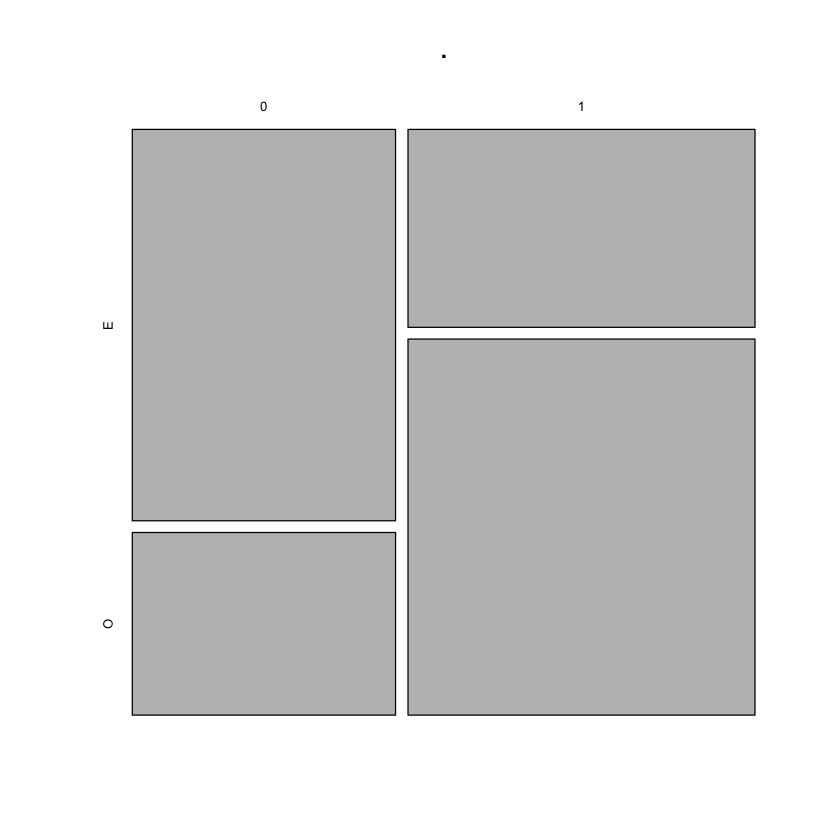

In [19]:
table(df$monestry_val, df$Majority)
table(df$monestry_val, df$Majority) %>% plot()
table(df$monestry_val, df$Majority) %>% chisq.test()
table(df$monestry_val, df$Majority) %>% fisher.test()

### Phi coefficient

In [20]:
## Phi coefficient calculated from the matrix

table(df$monestry_val, df$Majority) %>% phi()

[1] 0.33

In [21]:
## Phi coefficient calculated from the chi-sq test
sqrt(4.4163/52)

[1] 0.2914255

## Descriptive Plot

               
                 E  O
  day_care      10  5
  international  5  2
  monastery     10 19

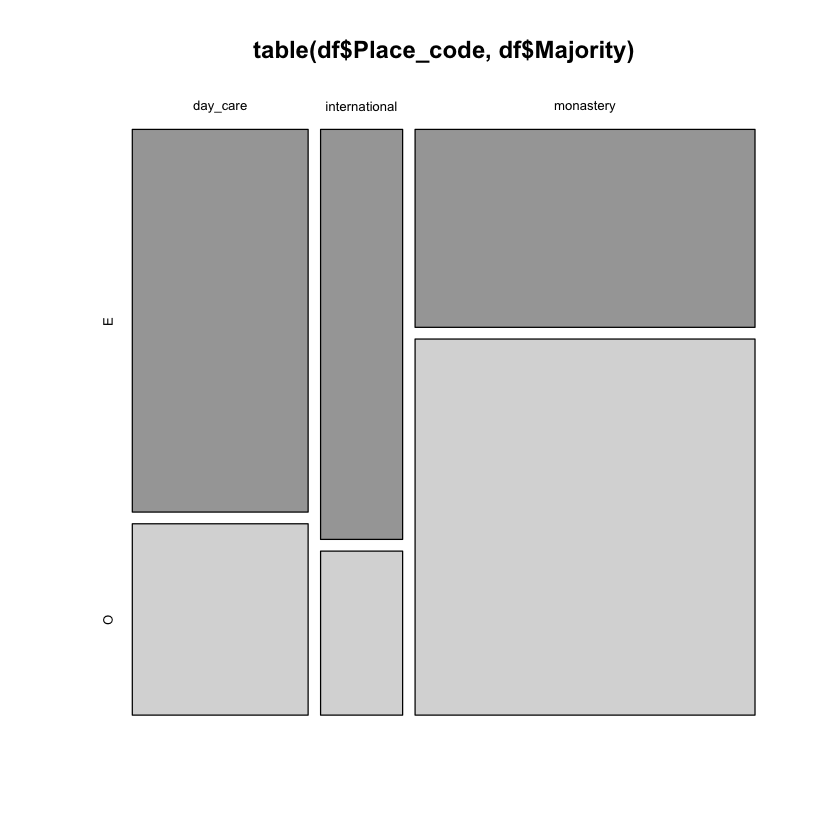

In [22]:
table(df$Place_code, df$Majority)
plot(table(df$Place_code, df$Majority), col = c('gray65','gray85'), xlable)
#plot(table(df$Majority, df$Place_code))